# Exercise 6-1

  
## Taniya Adhikari  
   
### 10/10/2020


In [178]:
from __future__ import print_function, division

%matplotlib inline

import numpy as np

import brfss

import thinkstats2
import thinkplot

from scipy import stats

## Exercise 6-1

The distribution of income is famously skewed to the right. In this exercise, we’ll measure how strong that skew is.
The Current Population Survey (CPS) is a joint effort of the Bureau of Labor Statistics and the Census Bureau to study income and related variables. Data collected in 2013 is available from http://www.census.gov/hhes/www/cpstables/032013/hhinc/toc.htm. I downloaded `hinc06.xls`, which is an Excel spreadsheet with information about household income, and converted it to `hinc06.csv`, a CSV file you will find in the repository for this book. You will also find `hinc2.py`, which reads this file and transforms the data.

The dataset is in the form of a series of income ranges and the number of respondents who fell in each range. The lowest range includes respondents who reported annual household income “Under \$5000.” The highest range includes respondents who made “\$250,000 or more.”

To estimate mean and other statistics from these data, we have to make some assumptions about the lower and upper bounds, and how the values are distributed in each range. `hinc2.py` provides `InterpolateSample`, which shows one way to model this data. It takes a `DataFrame` with a column, `income`, that contains the upper bound of each range, and `freq`, which contains the number of respondents in each frame.

It also takes `log_upper`, which is an assumed upper bound on the highest range, expressed in `log10` dollars. The default value, `log_upper=6.0` represents the assumption that the largest income among the respondents is $10^6$, or one million dollars.

`InterpolateSample` generates a pseudo-sample; that is, a sample of household incomes that yields the same number of respondents in each range as the actual data. It assumes that incomes in each range are equally spaced on a `log10` scale.

In [179]:
def InterpolateSample(df, log_upper):
    """Makes a sample of log10 household income.

    Assumes that log10 income is uniform in each range.

    df: DataFrame with columns income and freq
    log_upper: log10 of the assumed upper bound for the highest range

    returns: NumPy array of log10 household income
    """
    # compute the log10 of the upper bound for each range
    df['log_upper'] = np.log10(df.income)

    # get the lower bounds by shifting the upper bound and filling in
    # the first element
    df['log_lower'] = df.log_upper.shift(1)
    df.loc[0, 'log_lower'] = 3.0

    # plug in a value for the unknown upper bound of the highest range
    df.loc[41, 'log_upper'] = log_upper
    
    # use the freq column to generate the right number of values in
    # each range
    arrays = []
    for i,row in df.iterrows():
        vals = np.linspace(row.log_lower, row.log_upper, row.freq)
        arrays.append(vals)

    # collect the arrays into a single sample
    log_sample = np.concatenate(arrays)
    return log_sample

In [180]:
# reads and transforms the data
import hinc
income_df = hinc.ReadData()

In [181]:
# generate pseudo sample with same number of respondants in each range.
log_sample = InterpolateSample(income_df, 6.0)

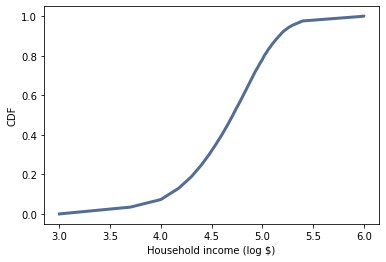

In [182]:
log_cdf = thinkstats2.Cdf(log_sample)
thinkplot.Cdf(log_cdf)
thinkplot.Config(xlabel='Household income (log $)',
               ylabel='CDF')

In [183]:
sample = np.power(10, log_sample)

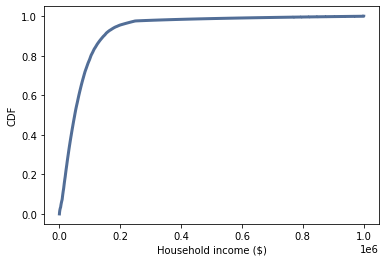

In [184]:
cdf = thinkstats2.Cdf(sample)
thinkplot.Cdf(cdf)
thinkplot.Config(xlabel='Household income ($)',
               ylabel='CDF')

Compute the median, mean, skewness and Pearson’s skewness of the resulting sample. What fraction of households report a taxable income below the mean?

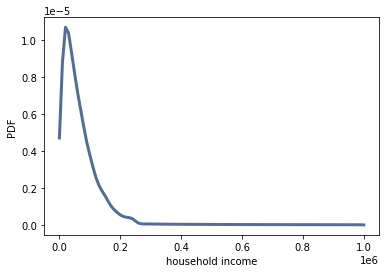

<Figure size 576x432 with 0 Axes>

In [185]:
pdf = thinkstats2.EstimatedPdf(sample)
thinkplot.Pdf(pdf)
thinkplot.Show(xlabel='household income', ylabel='PDF')

In [186]:
# calculates kth raw moment
def RawMoment(xs, k):
    return sum(x**k for x in xs) / len(xs)

In [187]:
# calculates kth central moments with mean
def CentralMoment(xs, k):
    mean = RawMoment(xs, 1)
    return sum((x - mean)**k for x in xs) / len(xs)

In [188]:
# calculates kth standardized moments with std
def StandardizedMoment(xs, k):
    var = CentralMoment(xs, 2)
    std = np.sqrt(var)
    return CentralMoment(xs, k) / std**k

In [189]:
# calculates using thinkstats2 code
def Median(xs):
    cdf = thinkstats2.Cdf(xs)
    return cdf.Value(0.5)

In [190]:
def Moments(xs):

    # raw moment with k = 1 is the sample mean
    mean = RawMoment(xs, 1)
    print("The sample mean is {}".format(mean))
    
    # calls Median function
    median = Median(xs)
    print("The median of sample is {}".format(median))
          
    # central moment with k =2 is variance
    var = CentralMoment(xs, 2)
    std = np.sqrt(var)
    print("The standard deviation of sample is {}".format(std))
    
    # standardized moment with k = 3 measures skewness
    skewness = StandardizedMoment(xs, 3)
    print("The skewness sample is {}".format(skewness))
    
    # person Median skewness formula
    pearsonMedianSkewness = 3 * (mean - median) / std
    print("The pearson median skewness sample is {}".format(pearsonMedianSkewness))


In [191]:
 Moments(sample)

The sample mean is 74278.70753118733
The median of sample is 51226.45447894046
The standard deviation of sample is 93946.92996347832
The skewness sample is 4.949920244429583
The pearson median skewness sample is 0.7361258019141782


In [192]:
# calculates the area below mean in the above graph.
cdf[mean]

0.660005879566872

**About 66% of people report taxable income below the mean.**

How do the results depend on the assumed upper bound?

In [193]:
log_sample2 = InterpolateSample(income_df, 7)

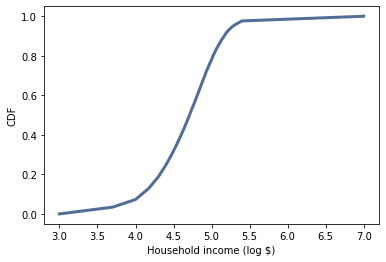

In [194]:
log_cdf2 = thinkstats2.Cdf(log_sample2)
thinkplot.Cdf(log_cdf2)
thinkplot.Config(xlabel='Household income (log $)',
               ylabel='CDF')

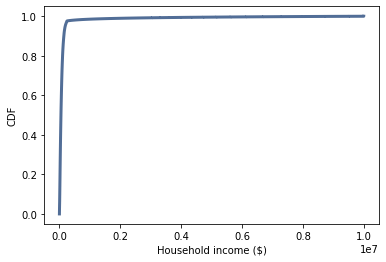

In [195]:
sample2 = np.power(10, log_sample2)
cdf2 = thinkstats2.Cdf(sample2)
thinkplot.Cdf(cdf2)
thinkplot.Config(xlabel='Household income ($)',
               ylabel='CDF')

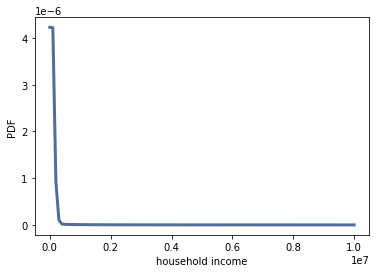

<Figure size 576x432 with 0 Axes>

In [196]:
pdf2 = thinkstats2.EstimatedPdf(sample2)
thinkplot.Pdf(pdf2)
thinkplot.Show(xlabel='household income', ylabel='PDF')

In [197]:
 Moments(sample2)

The sample mean is 124267.39722164685
The median of sample is 51226.45447894046
The standard deviation of sample is 559608.5013743473
The skewness sample is 11.603690267537793
The pearson median skewness sample is 0.39156450927742087


Increasing the upper bound to $10^7$ increased the mean and standard deviation. It didn't change the median. It also increased te skewness but it reduced the pearson skewness, it makes sense since the standard deviation increased significantly. The upper bound changed the std because the spread of the data also increased. The data in the above graph also shows that it is highly skewed